In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1.1 Modèle de projection

In [2]:
#Function returns the camera projection: 
def make_projective(θx, θy, θz, tx, ty, tz,K):

    Rx = np.array([[1, 0, 0, 0], 
                       [1, np.cos(θx), -np.sin(θx), 0], 
                       [0, np.sin(θx), np.cos(θx), 0], 
                       [0, 0, 0, 1]])

    Ry = np.array([[np.cos(θy), 0, np.sin(θy), 0], 
                   [0, 1, 0, 0], 
                   [-np.sin(θy), 0, np.cos(θy), 0], 
                   [0, 0, 0, 1]])

    Rz = np.array([[np.cos(θz), -np.sin(θz), 0, 0], 
                   [np.sin(θz), np.cos(θz), 0 , 0], 
                   [0, 0 , 1, 0], 
                   [0, 0, 0, 1]])

    R = Rx@ Ry @Rz
    
    T = np.array([[1, 0 , 0, tx],
                     [0, 1, 0, ty],
                     [0, 0, 1, tz],
                     [0, 0, 0, 1]])
    
    #k = np.array([[],[0,800,250],[0,0,1]])
    
    RT = R @T
    P = K @ RT[0:3,0:4]
    
    return P
    

In [3]:
#function to generate the 3D pixels coordinates projected on the image.
def project(P, X):
    x = P@X
    return x

# 1.2 Premier test de la fonction

In [4]:
θx = 20*(np.pi)/180
tz = 2
K = np.array([[800,0,250],[0,800,250],[0,0,1]])

X = np.array([np.transpose([0,0,0,1]),
                  np.transpose([1,0,0,1]),
                  np.transpose([0,1,0,1]),
                  np.transpose([0,0,1,1]),
                  np.transpose([1,1,0,1]),
                  np.transpose([1,0,1,1]),
                  np.transpose([0,1,1,1]),
                  np.transpose([1,1,1,1])])

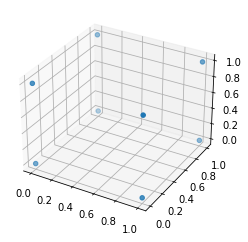

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0],X[:,1], X[:,2])

In [6]:
x = np.transpose(X)

In [7]:
x[0:3,0:8]

array([[0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 0, 1, 0, 1, 1, 1]])

In [8]:
P = make_projective(θx, 0, 0, 0, 0, tz,K)

In [9]:
P.shape

(3, 4)

In [10]:
proj2d = project(P, x)
print(proj2d)

[[ 469.84631039 1269.84631039  555.35134622  704.76946559 1355.35134622
  1504.76946559  790.27450142 1590.27450142]
 [ -77.38591893  722.61408107  759.87321353 -116.07887839 1559.87321353
   683.92112161  721.18025407 1521.18025407]
 [   1.87938524    1.87938524    2.22140538    2.81907786    2.22140538
     2.81907786    3.16109801    3.16109801]]


In [11]:
proj2d.shape

(3, 8)

In [12]:
proj2d/proj2d [2,:]

array([[250.        , 675.67110899, 250.        , 250.        ,
        610.13237631, 533.78073933, 250.        , 503.07662039],
       [-41.17618741, 384.49492158, 342.0686826 , -41.17618741,
        702.2010589 , 242.60455191, 228.14232674, 481.21894713],
       [  1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ]])

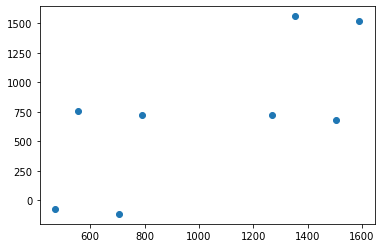

In [13]:
plt.scatter(proj2d[0,:],proj2d[1,:])

# 1.3 Experiments

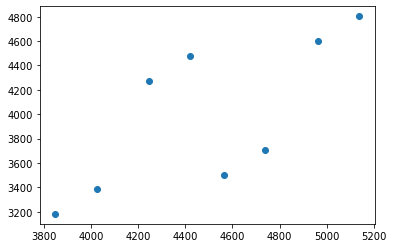

In [14]:
θx = 50*(np.pi)/180
θy = 50*(np.pi)/180
θz = 50*(np.pi)/180
tx = 2
ty = 2
tz = 5

K = np.array([[800,0,250],[0,800,250],[0,0,1]])

P = make_projective(θx, θy, θz, tx, ty, tz,K)
proj2d = project(P, x)

plt.scatter(proj2d[0,:],proj2d[1,:])

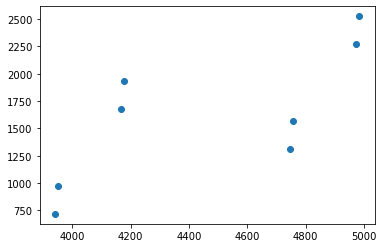

In [15]:
θx = 50*(np.pi)/180
θy = 70*(np.pi)/180
θz = 60*(np.pi)/180
tx = 0
ty = 8
tz = 5

K = np.array([[800,0,250],[0,800,250],[0,0,1]])

P = make_projective(θx, θy, θz, tx, ty, tz,K)
proj2d = project(P, x)

plt.scatter(proj2d[0,:],proj2d[1,:])

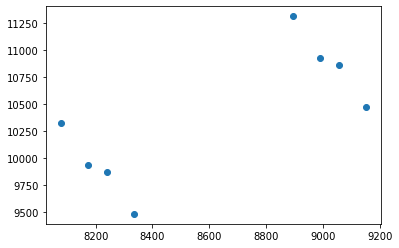

In [16]:
θx = 50*(np.pi)/180
θy = 0
θz = 20*(np.pi)/180
tx = 10
ty = 0
tz = 0

K = np.array([[800,0,250],[0,800,250],[0,0,1]])

P = make_projective(θx, θy, θz, tx, ty, tz,K)
proj2d = project(P, x)

plt.scatter(proj2d[0,:],proj2d[1,:])

# 2 Hall method

In [17]:
θx = 0.8*(np.pi/2)
θy = -1.8*(np.pi/2)
θz = np.pi/5
tx = 100
ty = 0
tz = 1500
K = np.array([[557.0943,0,326.3819],[0,712.9824,298.6679],[0,0,1]])

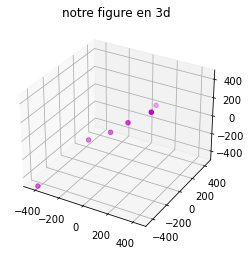

In [18]:
#Extrinsec and intrinsec matrix parameters: 
n = 6
o = np.linspace(-480, 480,n) 

x = np.random.rand(n)*o
y = np.random.rand(n)*o
z = np.random.rand(n)*o


fig = plt.figure()

ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, c='m')
ax.set_title("notre figure en 3d")
ax.set_xlim3d(-480,480)
ax.set_ylim3d(-480,480)
ax.set_zlim3d(-480,480)
plt.show()

In [19]:
#random 6 points
X = np.array([np.transpose([x[0],y[0],z[0],1]),
                  np.transpose([x[1],y[1],z[1],1]),
                  np.transpose([x[2],y[2],z[2],1]),
                  np.transpose([x[3],y[3],z[3],1]),
                  np.transpose([x[4],y[4],z[4],1]),
                  np.transpose([x[5],y[5],z[5],1])])

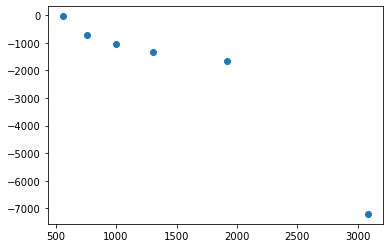

In [20]:
#Projection of 6 points on 2D plan.
X = np.transpose(X)
P = make_projective(θx, θy, θz, tx, ty, tz,K)
x = project(P, X)
x = x/x[2,:]
plt.scatter(x[0,:],x[1,:])

In [21]:
Q = np.zeros((2*len(X[0,:]),11))
B = np.zeros((2*len(X[0,:]),1))

for i in range(len(X[0,:])) :  
    Q[2*i,:] = np.array([X[0,i], X[1,i], X[2,i],1,0,0,0,0,-x[0,i]*X[0,i],-x[0,i]*X[1,i],-x[0,i]*X[2,i]]) 
    Q[2*i+1,:] = np.array([0,0,0,0,X[0,i], X[1,i], X[2,i],1,-x[1,i]*X[0,i],-x[1,i]*X[1,i],-x[1,i]*X[2,i]])
    B[2*i,:] = np.array([x[0,i]])
    B[2*i+1,:] = np.array([x[1,i]])

In [22]:
QT = np.transpose(Q)
QTq = QT@Q
QTin = np.linalg.pinv(QTq)
A = QTin @ QT @ B
A = np.array([[A[0,0], A[1,0], A[2,0], A[3,0]], [A[4,0], A[5,0], A[6,0], A[7,0]], [A[8,0], A[9,0], A[10,0], 1]])
A

array([[ 5.85798519e-01, -1.44277348e+00,  7.10677059e-01,
         1.12458443e+03],
       [ 1.05662167e+00, -2.42043412e+00, -8.92869648e-01,
        -1.23363361e+03],
       [-1.68678427e-03, -1.89095929e-03,  7.79128647e-04,
         1.00000000e+00]])

In [23]:
P/P[2,3]

array([[ 5.85805012e-01, -1.44277269e+00,  7.10669256e-01,
         1.12458439e+03],
       [ 1.05661691e+00, -2.42043611e+00, -8.92863516e-01,
        -1.23363358e+03],
       [-1.68677443e-03, -1.89095982e-03,  7.79118295e-04,
         1.00000000e+00]])

In [24]:
project2d = project(A,X)
project2d

array([[ 1.23251266e+03,  1.08291756e+03,  1.11515070e+03,
         1.22255682e+03,  1.43532523e+03,  8.28284484e+02],
       [-9.43319147e+01, -1.05347731e+03, -1.17136063e+03,
        -1.24579867e+03, -1.23843059e+03, -1.93537861e+03],
       [ 2.18828471e+00,  1.42572292e+00,  1.11486407e+00,
         9.37705576e-01,  7.47836982e-01,  2.68861296e-01]])

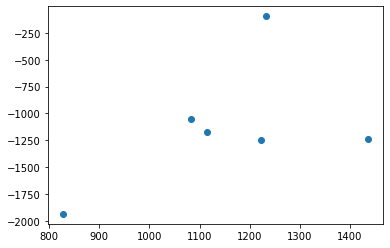

In [25]:
plt.scatter(project2d[0,:], project2d[1,:])

In [26]:
mean = 0
var = 1
sigma = var ** 0.5
r,c = x.shape
gaussian = np.random.normal(mean, sigma, (r,c))
x_noisy = np.zeros((r,c), np.float32)
x_noisy = x + gaussian
#x = project(P, X)
x_noisy = x_noisy/x_noisy[2,:]

In [27]:
Q = np.zeros((2*len(X[0,:]),11))
B = np.zeros((2*len(X[0,:]),1))
x = x_noisy
for i in range(len(X[0,:])) :  
    Q[2*i,:] = np.array([X[0,i], X[1,i], X[2,i],1,0,0,0,0,-x[0,i]*X[0,i],-x[0,i]*X[1,i],-x[0,i]*X[2,i]]) 
    Q[2*i+1,:] = np.array([0,0,0,0,X[0,i], X[1,i], X[2,i],1,-x[1,i]*X[0,i],-x[1,i]*X[1,i],-x[1,i]*X[2,i]])
    B[2*i,:] = np.array([x[0,i]])
    B[2*i+1,:] = np.array([x[1,i]])

In [28]:
QT = np.transpose(Q)
QTq = QT@Q
QTin = np.linalg.pinv(QTq)
A = QTin @ QT @ B
A = np.array([[A[0,0], A[1,0], A[2,0], A[3,0]], [A[4,0], A[5,0], A[6,0], A[7,0]], [A[8,0], A[9,0], A[10,0], 1]])

In [29]:
A

array([[ 7.15353499e+00, -2.32308794e+00, -3.91299004e+00,
         8.56182142e+02],
       [-5.76724789e+00, -9.50688422e-01,  3.93431509e+00,
        -9.44778218e+02],
       [ 2.25076034e-02, -2.66797732e-03, -2.45672081e-02,
         1.00000000e+00]])

In [30]:
project2d = project(A,X)
project2d

array([[ 9.59164857e+02,  2.62723036e+02,  7.32473406e+02,
         1.02171601e+03,  1.60303006e+03,  6.86484347e+02],
       [-7.18537840e+01, -2.55161689e+02, -7.82907741e+02,
        -1.02267091e+03, -1.38785244e+03, -1.60350898e+03],
       [ 4.95027235e+00,  1.74744383e-01,  9.38875515e-01,
         4.72337811e-01,  2.21389664e-01,  6.44784874e-01]])

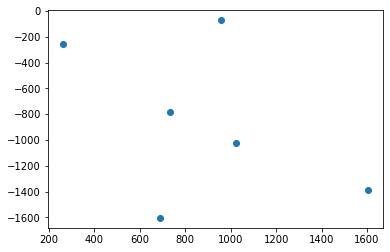

In [31]:
plt.scatter(project2d[0,:], project2d[1,:])

7-

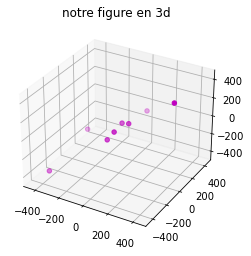

In [32]:
#Extrinsec and intrinsec matrix parameters: 
n = 8
o = np.linspace(-480, 480,n) 

x = np.random.rand(n)*o
y = np.random.rand(n)*o
z = np.random.rand(n)*o


fig = plt.figure()

ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, c='m')
ax.set_title("notre figure en 3d")
ax.set_xlim3d(-480,480)
ax.set_ylim3d(-480,480)
ax.set_zlim3d(-480,480)
plt.show()

In [33]:
#random 8 points
X = np.array([np.transpose([x[0],y[0],z[0],1]),
                  np.transpose([x[1],y[1],z[1],1]),
                  np.transpose([x[2],y[2],z[2],1]),
                  np.transpose([x[3],y[3],z[3],1]),
                  np.transpose([x[4],y[4],z[4],1]),
                  np.transpose([x[5],y[5],z[5],1]),
                  np.transpose([x[6],y[6],z[6],1]),
                  np.transpose([x[7],y[7],z[7],1])])

In [34]:
X.shape

(8, 4)

In [35]:
#Projection of 6 points on 2D plan.
X = np.transpose(X)
P = make_projective(θx, θy, θz, tx, ty, tz,K)
x = project(P, X)
x = x/x[2,:]

In [36]:
Q = np.zeros((2*len(X[0,:]),11))
B = np.zeros((2*len(X[0,:]),1))


for i in range(len(X[0,:])) :  
    Q[2*i,:] = np.array([X[0,i], X[1,i], X[2,i],1,0,0,0,0,-x[0,i]*X[0,i],-x[0,i]*X[1,i],-x[0,i]*X[2,i]]) 
    Q[2*i+1,:] = np.array([0,0,0,0,X[0,i], X[1,i], X[2,i],1,-x[1,i]*X[0,i],-x[1,i]*X[1,i],-x[1,i]*X[2,i]])
    B[2*i,:] = np.array([x[0,i]])
    B[2*i+1,:] = np.array([x[1,i]])

In [37]:
QT = np.transpose(Q)
QTq = QT@Q
QTin = np.linalg.pinv(QTq)
A = QTin @ QT @ B
A = np.array([[A[0,0], A[1,0], A[2,0], A[3,0]], [A[4,0], A[5,0], A[6,0], A[7,0]], [A[8,0], A[9,0], A[10,0], 1]])
A

array([[ 5.85804998e-01, -1.44277264e+00,  7.10669226e-01,
         1.12458439e+03],
       [ 1.05661692e+00, -2.42043620e+00, -8.92863446e-01,
        -1.23363358e+03],
       [-1.68677445e-03, -1.89095980e-03,  7.79118302e-04,
         1.00000000e+00]])

In [38]:
project2d = project(A,X)
project2d

array([[ 1.12784182e+03,  9.84354240e+02,  1.14240854e+03,
         1.17529467e+03,  1.11137388e+03,  1.08319547e+03,
         8.99183598e+02,  1.20146232e+03],
       [-4.53515174e+02, -1.32943432e+03, -1.01427498e+03,
        -1.12199352e+03, -1.33342646e+03, -1.36577805e+03,
        -1.76541436e+03, -1.62948939e+03],
       [ 1.98947844e+00,  1.41515144e+00,  1.16180441e+00,
         1.09813807e+00,  8.47487905e-01,  9.38440330e-01,
         4.47947936e-01,  2.46578964e-01]])

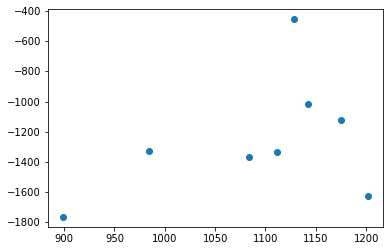

In [39]:
plt.scatter(project2d[0,:], project2d[1,:])

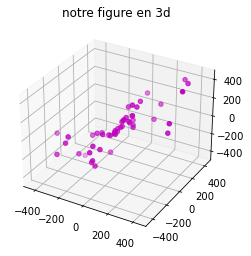

In [40]:
#Extrinsec and intrinsec matrix parameters: 
n = 50
o = np.linspace(-480, 480,n)

x = np.transpose(np.random.rand(n)*o)
y = np.transpose(np.random.rand(n)*o)
z = np.transpose(np.random.rand(n)*o)


fig = plt.figure()

ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, c='m')
ax.set_title("notre figure en 3d")
ax.set_xlim3d(-480,480)
ax.set_ylim3d(-480,480)
ax.set_zlim3d(-480,480)
plt.show()

In [41]:
X = np.zeros([n, 4]) 
for i in range(n):
    X[i] = np.transpose([x[i],y[i],z[i],1])

In [42]:
#Projection of 50 points on 2D plan.
X = np.transpose(X)
P = make_projective(θx, θy, θz, tx, ty, tz,K)
x = project(P, X)
x = x/x[2,:]

In [43]:
Q = np.zeros((2*len(X[0,:]),11))
B = np.zeros((2*len(X[0,:]),1))

for i in range(len(X[0,:])) :  
    Q[2*i,:] = np.array([X[0,i], X[1,i], X[2,i],1,0,0,0,0,-x[0,i]*X[0,i],-x[0,i]*X[1,i],-x[0,i]*X[2,i]]) 
    Q[2*i+1,:] = np.array([0,0,0,0,X[0,i], X[1,i], X[2,i],1,-x[1,i]*X[0,i],-x[1,i]*X[1,i],-x[1,i]*X[2,i]])
    B[2*i,:] = np.array([x[0,i]])
    B[2*i+1,:] = np.array([x[1,i]])

In [44]:
QT = np.transpose(Q)
QTq = QT@Q
QTin = np.linalg.pinv(QTq)
A = QTin @ QT @ B
A = np.array([[A[0,0], A[1,0], A[2,0], A[3,0]], [A[4,0], A[5,0], A[6,0], A[7,0]], [A[8,0], A[9,0], A[10,0], 1]])
A

array([[ 5.85804385e-01, -1.44277256e+00,  7.10669642e-01,
         1.12458438e+03],
       [ 1.05661716e+00, -2.42043608e+00, -8.92863725e-01,
        -1.23363357e+03],
       [-1.68677457e-03, -1.89095985e-03,  7.79118436e-04,
         1.00000000e+00]])

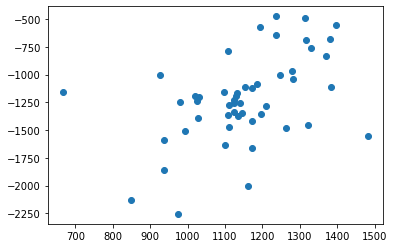

In [45]:
project2d = project(A,X)
plt.scatter(project2d[0,:], project2d[1,:])